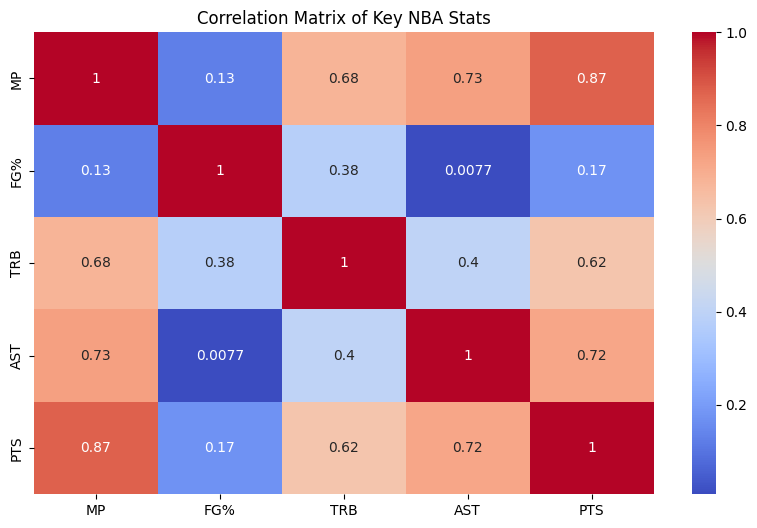

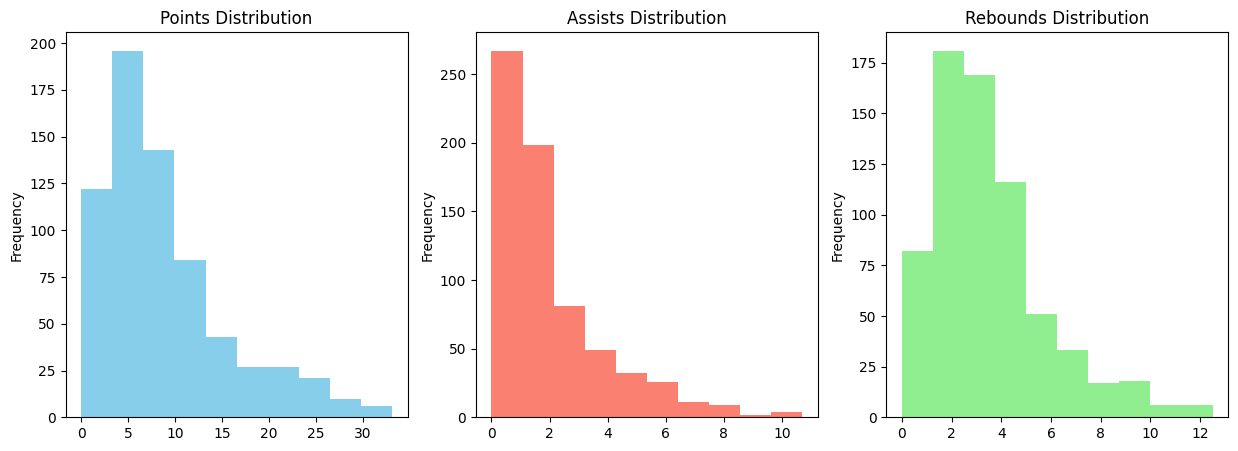

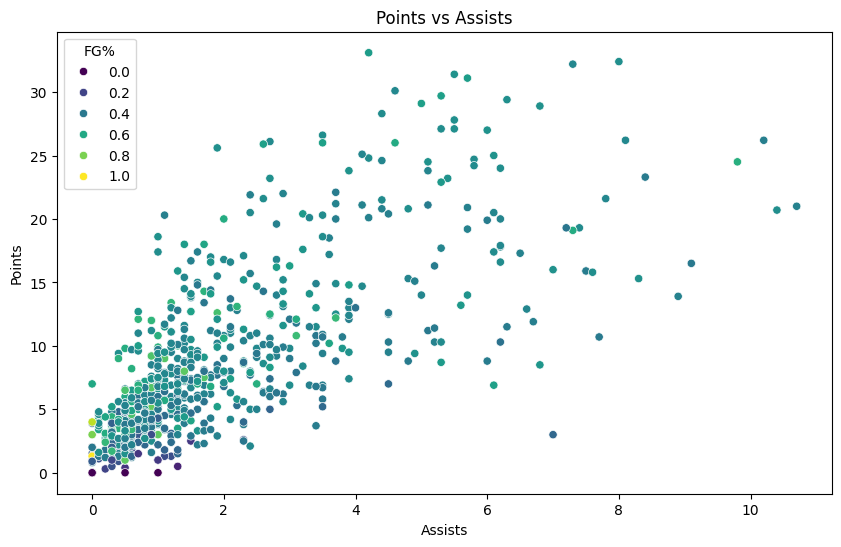

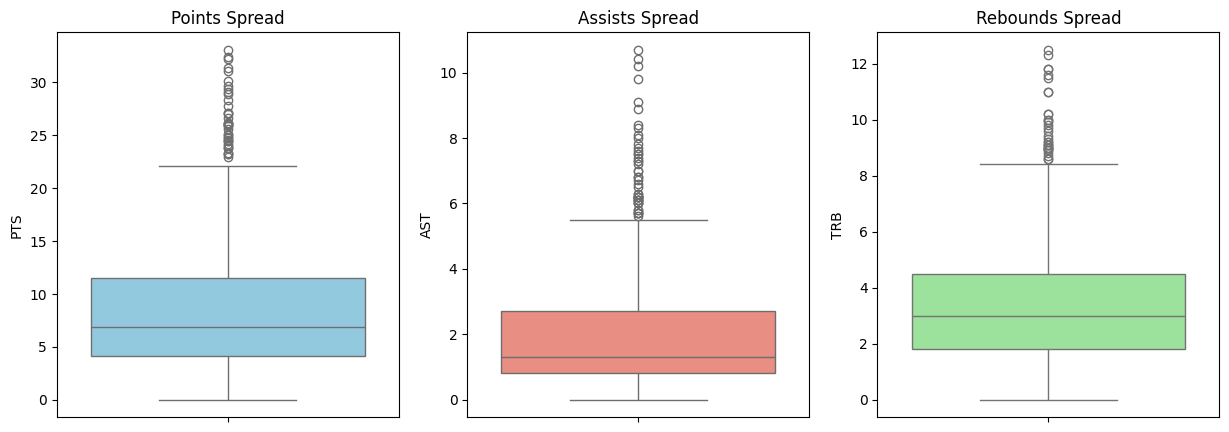

Top 10 Players by Points:
                       Player   PTS  AST   TRB
184              Joel Embiid  33.1  4.2  10.2
160              Luka Dončić  32.4  8.0   8.6
373           Damian Lillard  32.2  7.3   4.8
209  Shai Gilgeous-Alexander  31.4  5.5   4.8
12     Giannis Antetokounmpo  31.1  5.7  11.8
590             Jayson Tatum  30.1  4.6   8.8
175             Kevin Durant  29.7  5.3   6.7
139            Stephen Curry  29.4  6.3   6.1
174             Kevin Durant  29.1  5.0   6.7
306             LeBron James  28.9  6.8   8.3


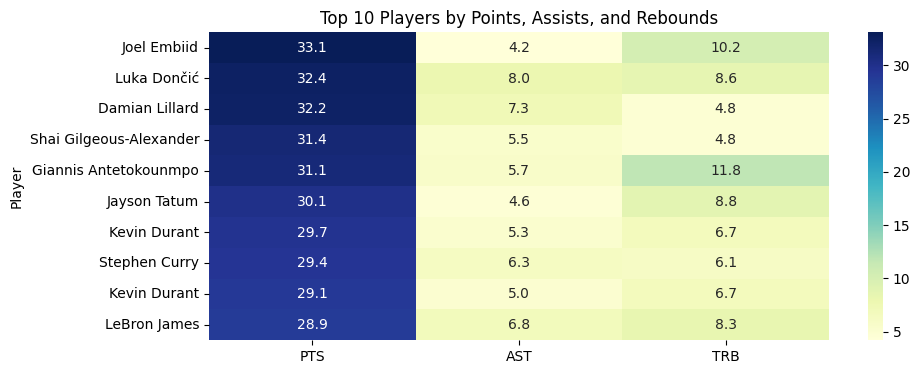

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nba_data = pd.read_csv("/content/NBA Player Stats Dataset for the 2022-2023  export 2024-10-31 17-18-49 (1).zip")

nba_data_filtered = nba_data[['Player', 'MP', 'FG%', 'TRB', 'AST', 'PTS']].copy()

nba_data_filtered['FG%'] = pd.to_numeric(nba_data_filtered['FG%'], errors='coerce')
nba_data_filtered['TRB'] = pd.to_numeric(nba_data_filtered['TRB'], errors='coerce')
nba_data_filtered['AST'] = pd.to_numeric(nba_data_filtered['AST'], errors='coerce')
nba_data_filtered['PTS'] = pd.to_numeric(nba_data_filtered['PTS'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(nba_data_filtered[['MP', 'FG%', 'TRB', 'AST', 'PTS']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key NBA Stats")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
nba_data_filtered['PTS'].plot(kind='hist', ax=axes[0], color='skyblue', title='Points Distribution')
nba_data_filtered['AST'].plot(kind='hist', ax=axes[1], color='salmon', title='Assists Distribution')
nba_data_filtered['TRB'].plot(kind='hist', ax=axes[2], color='lightgreen', title='Rebounds Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba_data_filtered, x='AST', y='PTS', hue='FG%', palette='viridis')
plt.title("Points vs Assists")
plt.xlabel("Assists")
plt.ylabel("Points")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=nba_data_filtered, y='PTS', ax=axes[0], color='skyblue')
sns.boxplot(data=nba_data_filtered, y='AST', ax=axes[1], color='salmon')
sns.boxplot(data=nba_data_filtered, y='TRB', ax=axes[2], color='lightgreen')
axes[0].set_title('Points Spread')
axes[1].set_title('Assists Spread')
axes[2].set_title('Rebounds Spread')
plt.show()

top_performers = nba_data_filtered[['Player', 'PTS', 'AST', 'TRB']].nlargest(10, 'PTS')
print("Top 10 Players by Points:\n", top_performers)

plt.figure(figsize=(10, 4))
sns.heatmap(top_performers.set_index('Player'), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Top 10 Players by Points, Assists, and Rebounds")
plt.show()